# DMDW - Mini Project - 1
### Author : Kapeel Suryavanshi (BT16CSE084, 19896)
## Topic : Classification
### Dataset Used: Iris
### Algorithms Compared :
1. Support Vector Classifier (Linear SVM) 
2. Support Vector Classifier (rbf SVM)
3. Decision Tree
4. Random Forest
5. Logistic Regression
6. Linear Discriminant Analysis
7. Gaussian Naive Bayes
8. XGBoost
9. K-Nearest Neighbours (KNN)
10. Gradient Boosting Classifier

In [25]:
# Import all necessary files
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

##  Load Iris Dataset 

##### Dataset is loaded from the "iris.csv" file

In [26]:
data = pd.read_csv('iris.csv')
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Statistical study of the data

In [27]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# Mean and Median According to Target Labels
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [29]:
# Standard Deviation According to Target Labels
data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


##### Check for Missing Data

In [30]:
data[data.isnull()].count()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Visualizing the Data with Plots

These plots give us an understanding on the spread of the features.

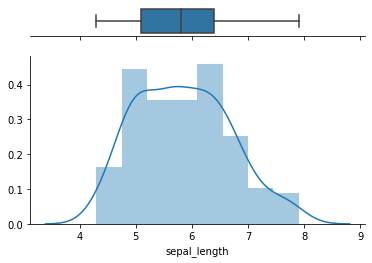

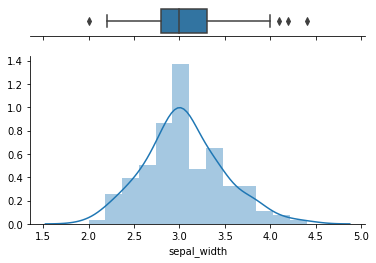

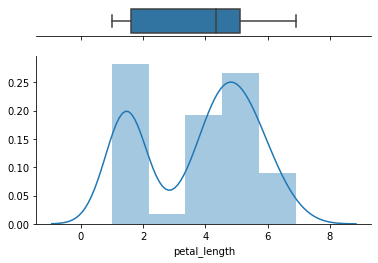

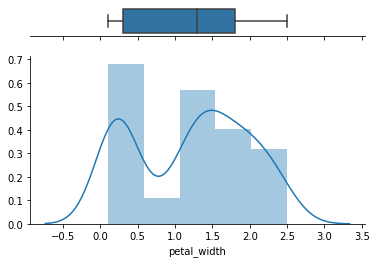

In [31]:
for column in data.columns[:-1]:
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
    # Add a graph in each part
    sns.boxplot(data[column], ax=ax_box)
    sns.distplot(data[column], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

### Scatter-Matrix plot of the data

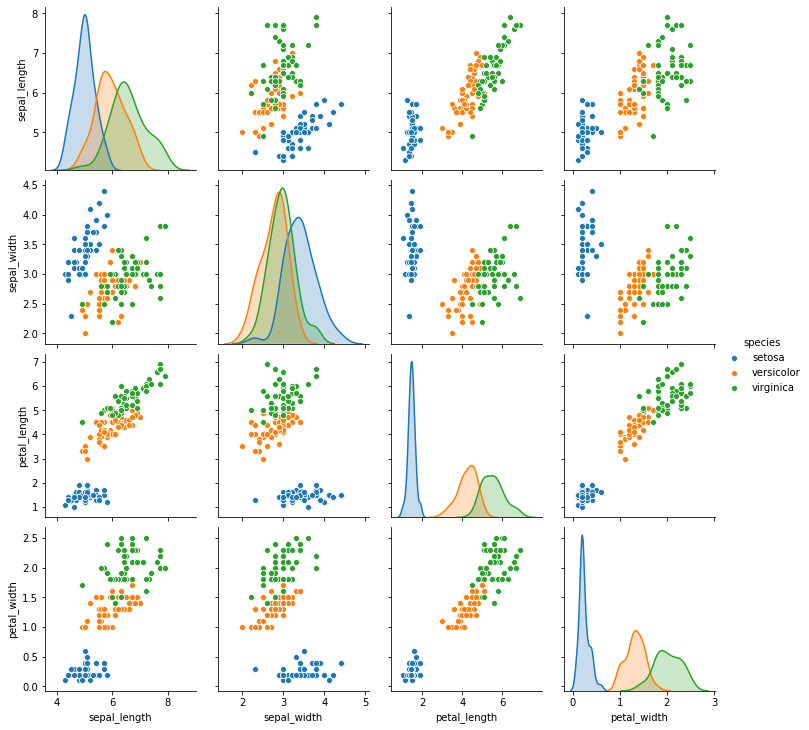

In [32]:
sns.pairplot(data, hue="species")
plt.show()

### Correlation between the features

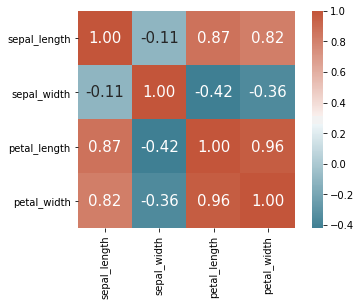

In [33]:
cols = data.columns[:-1]
corr_matrix = data[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap=sns.diverging_palette(220, 20, as_cmap=True))

##### From the above plot and matrix it is seen that Petal Length and Width show a strong coorelation whereas the Sepal Length and Width show weak correlations, it indicates that the Species can be identified better using Petal compared to Sepal.

### Create Training and Testing Data

#####  30 % of the total training data is used as testing data.

In [34]:
"""
Obtaining the Features from the Data
""" 
X = data.iloc[:,:-1]
print("Feature (Input) Values - X")
display(X)
# X = X.values

"""
Obtaining the Target Labels from the Data
"""
y = data['species']
print("Target Values - Y")
display(y)

# Divide the Data into training and testing with 30% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print("Training Data Dimensions : X_train : {} \t y_train : {}".format(X_train.shape, y_train.shape))
print("Testing Data Dimensions  : X_test  : {} \t y_test  : {}".format(X_test.shape, y_test.shape))

Feature (Input) Values - X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Target Values - Y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Training Data Dimensions : X_train : (112, 4) 	 y_train : (112,)
Testing Data Dimensions  : X_test  : (38, 4) 	 y_test  : (38,)


### Standardizing and scaling the features

In [35]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print('First 5 rows of our data after standardizing the features :')
print(pd.DataFrame(X_train_std, columns=data.columns[:-1]).head())

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

results = {}

First 5 rows of our data after standardizing the features :
   sepal_length  sepal_width  petal_length  petal_width
0     -0.891469     0.520675     -1.142872    -0.882127
1     -1.015653     0.293766     -1.424814    -1.268058
2     -0.518915     1.882129     -1.368426    -1.010771
3     -0.891469     0.974493     -1.312038    -1.268058
4     -1.760762    -0.386961     -1.312038    -1.268058


### 1. Support Vector Classification (Linear SVM)

In [36]:
svm = LinearSVC()
svm.fit(X_train_std, y_train)

train_score = svm.score(X_train_std, y_train)
test_score = svm.score(X_test_std, y_test)
print('The accuracy of the Linear SVM classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Linear SVM classifier on test data is {:.4f}'.format(test_score))

y_pred = svm.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Linear_SVM"] = test_score

The accuracy of the Linear SVM classifier on training data is 0.9554
The accuracy of the Linear SVM classifier on test data is 0.8947
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      0.91      0.95        11
  versicolor       0.88      0.88      0.88        16
   virginica       0.83      0.91      0.87        11

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.90        38



### 2. Support Vector Classification (rbf SVM)

In [37]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

train_score = svm.score(X_train_std, y_train)
test_score = svm.score(X_test_std, y_test)
print('The accuracy of the RBF SVM classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the RBF SVM classifier on test data is {:.4f}'.format(test_score))

y_pred = svm.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["rbf_SVM"] = test_score

The accuracy of the RBF SVM classifier on training data is 0.9732
The accuracy of the RBF SVM classifier on test data is 0.9211
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      0.88      0.90        16
   virginica       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38



### 3. Decision Tree

In [38]:
decision_tree = DecisionTreeClassifier(criterion='gini')

decision_tree.fit(X_train_std, y_train)

train_score = decision_tree.score(X_train_std, y_train)
test_score = decision_tree.score(X_test_std, y_test)
print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Decision Tree classifier on test data is {:.4f}'.format(test_score))

y_pred = decision_tree.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Decision_Tree"] = test_score

The accuracy of the Decision Tree classifier on training data is 1.0000
The accuracy of the Decision Tree classifier on test data is 0.9737
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.94      0.97        16
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### 4. Random Forest

In [39]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train_std, y_train)

train_score = random_forest.score(X_train_std, y_train)
test_score = random_forest.score(X_test_std, y_test)
print('The accuracy of the Random Forest classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Random Forest classifier on test data is {:.4f}'.format(test_score))

y_pred = random_forest.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Random_Forest"] = test_score

The accuracy of the Random Forest classifier on training data is 1.0000
The accuracy of the Random Forest classifier on test data is 0.9474
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### 5. Logistic Regression

In [40]:
lrc = LogisticRegression()
lrc.fit(X_train_std, y_train)

train_score = lrc.score(X_train_std, y_train)
test_score = lrc.score(X_test_std, y_test)
print('The accuracy of the Logistic Regression classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Logistic Regression classifier on test data is {:.4f}'.format(test_score))

y_pred = lrc.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Logistic_Regression"] = test_score

The accuracy of the Logistic Regression classifier on training data is 0.9018
The accuracy of the Logistic Regression classifier on test data is 0.8947
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.75      0.86        16
   virginica       0.73      1.00      0.85        11

    accuracy                           0.89        38
   macro avg       0.91      0.92      0.90        38
weighted avg       0.92      0.89      0.90        38



### 6. Linear Discriminant Analysis

In [41]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)

train_score = lda.score(X_train_std, y_train)
test_score = lda.score(X_test_std, y_test)
print('The accuracy of the Linear Discriminant Analysis classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Linear Discriminant Analysis classifier on test data is {:.4f}'.format(test_score))

y_pred = lda.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Linear_Discriminant_Analysis"] = test_score

The accuracy of the Linear Discriminant Analysis classifier on training data is 0.9911
The accuracy of the Linear Discriminant Analysis classifier on test data is 0.9474
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### 7. Gaussian Naive Bayes

In [42]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

train_score = gnb.score(X_train_std, y_train)
test_score = gnb.score(X_test_std, y_test)
print('The accuracy of the Gaussian NB classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Gaussian NB classifier on test data is {:.4f}'.format(test_score))

y_pred = gnb.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Gaussian_NB"] = test_score

The accuracy of the Gaussian NB classifier on training data is 0.9643
The accuracy of the Gaussian NB classifier on test data is 0.9211
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      0.88      0.90        16
   virginica       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38



### 8. XGBoost

In [43]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_std, y_train)

train_score = xgb_cl.score(X_train_std, y_train)
test_score = xgb_cl.score(X_test_std, y_test)
print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the XGBoost classifier on test data is {:.4f}'.format(test_score))

y_pred = xgb_cl.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["XGBoost"] = test_score

The accuracy of the XGBoost classifier on training data is 1.0000
The accuracy of the XGBoost classifier on test data is 0.9211
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      0.88      0.90        16
   virginica       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38



### 9. K - Nearest Neighbours (KNN)

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_std, y_train)

train_score = knn.score(X_train_std, y_train)
test_score = knn.score(X_test_std, y_test)
print('The accuracy of the K-Nearest Neighbours classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the K-Nearest Neighbours classifier on test data is {:.4f}'.format(test_score))

y_pred = knn.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["K_Nearest_Neighbours"] = test_score

The accuracy of the K-Nearest Neighbours classifier on training data is 0.9732
The accuracy of the K-Nearest Neighbours classifier on test data is 0.9474
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



#### Examining the effect of changing the n_neighbors parameter of KNN

In [45]:
for neighbors in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train_std, y_train)
    train_score = knn.score(X_train_std, y_train)
    test_score = knn.score(X_test_std, y_test)
    print ('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(train_score),
           'Test set score: {:.3f}'.format(test_score) )

neighbors: 1 Training set score: 1.000 Test set score: 0.921
neighbors: 2 Training set score: 0.973 Test set score: 0.921
neighbors: 3 Training set score: 0.964 Test set score: 0.921
neighbors: 4 Training set score: 0.964 Test set score: 0.947
neighbors: 5 Training set score: 0.973 Test set score: 0.947


### 10. Gradient Boosting Classifier

In [46]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)

train_score = gbc.score(X_train_std, y_train)
test_score = gbc.score(X_test_std, y_test)
print('The accuracy of the Gradient Boosting classifier on training data is {:.4f}'.format(train_score))
print('The accuracy of the Gradient Boosting classifier on test data is {:.4f}'.format(test_score))

y_pred = gbc.predict(X_test_std)
print("Classification Report :")
print(classification_report(y_test, y_pred))

results["Gradient_Boosting"] = test_score

The accuracy of the Gradient Boosting classifier on training data is 1.0000
The accuracy of the Gradient Boosting classifier on test data is 0.9474
Classification Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Compare the Performances of Algorithms

,Algorithm,Accuracy
0,Linear_SVM,0.894737
1,rbf_SVM,0.921053
2,Decision_Tree,0.973684
3,Random_Forest,0.947368
4,Logistic_Regression,0.894737
5,Linear_Discriminant_Analysis,0.947368
6,Gaussian_NB,0.921053
7,XGBoost,0.921053
8,K_Nearest_Neighbours,0.947368
9,Gradient_Boosting,0.947368


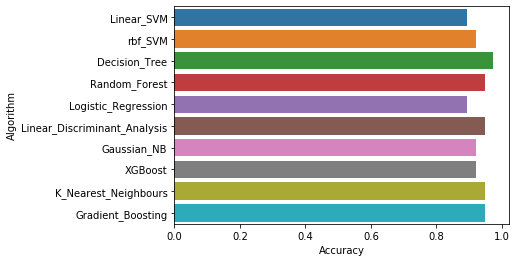

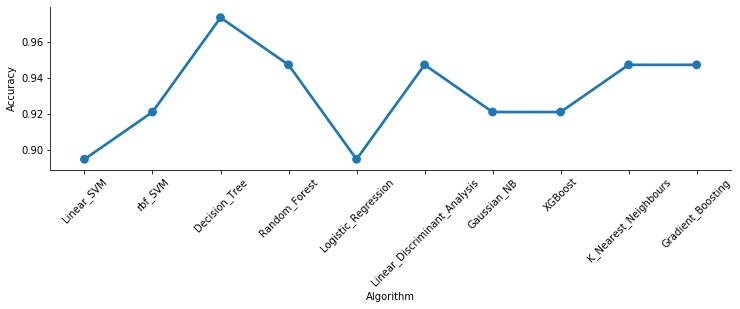

In [47]:
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm','Accuracy'])
display(results_df)

sns.barplot(x="Accuracy", y="Algorithm", data=results_df)
plt.show()

p = sns.factorplot(x='Algorithm',y='Accuracy',data=results_df,kind='point',size=3,aspect=3.5)
p.set_xticklabels(rotation=45)
plt.show()

### Conclusion 

All the above experiments were performed on a standardized and scaled data. Accuracies of the algorithms was in the range of 0.895 and 0.947. However, these results might change depending on the the dataset and hyperparameters.